In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! pip install -q kaggle

In [4]:
! cp '/content/gdrive/MyDrive/kaggle Competition/kaggle.json' 'kaggle.json'

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download -d gabrielsantello/advertisement-click-on-ad

  0% 0.00/39.4k [00:00<?, ?B/s]
100% 39.4k/39.4k [00:00<00:00, 33.3MB/s]


In [9]:
! unzip /content/advertisement-click-on-ad.zip

Archive:  /content/advertisement-click-on-ad.zip
  inflating: advertising.csv         


## Import Library
---
Memanggil library-library yang dibutuhkan untuk membuat model
1. Pandas
   * Untuk menampilkan dataset dalam bentuk dataframe
2. Matplotlib & Seaborn
   * Untuk memvisualisasikan data
3. sklearn 
   * Untuk Membuat Model Machine Learning (Logistic Regression, Decision Tree, Random forest, dan Gausian Naive Bayes)
   * Untuk melakukan splitting data
   * Untuk membuat matrix evaluasi

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data Understanding
---
  Dataset yang digunakan ini memiliki 1000 dataset, dengan beberapa fitur pada masing-masing kolom yang terdiri atas data numerik (Daily Time Spent on Site, Age, Area Income, dan Daily Internet Usage) dan juga data categorical (Ad Topic Line,	City,	Male,	Country, dan	Clicked on Ad).
  Pada fase ini, digunakan untuk mengetahui tentang data, seperti mencari tau data statistik dan mencari tahu apakah terdapat data yang bernilai null atau tidak.

In [20]:
data = pd.read_csv("/content/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [23]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [24]:
numerical_features  = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features = ['Ad Topic Line', 'City', 'Male', 'Clicked on Ad']

print(f"numerical_features : {numerical_features}")
print(f"categorical_features : {categorical_features}")

numerical_features : ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features : ['Ad Topic Line', 'City', 'Male', 'Clicked on Ad']


## Exploratory Data Analysis
---
Beberapa explorasi yang dilakukan antara lain :
1. mencari nilai outlier dan membuangnya
2. Mencari nilai persebaran data numerik, dan
3. mencari nilai persebaran data categorical

### Outlier Values

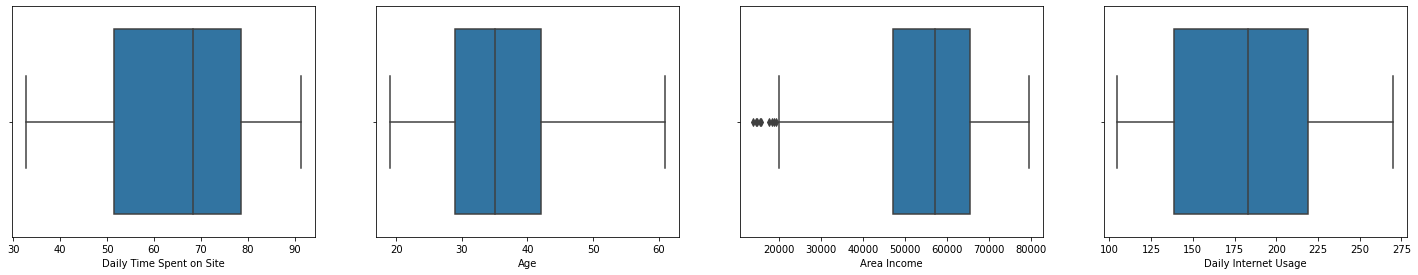

In [25]:
plt.figure(figsize=(25, 50))
for i in range(len(numerical_features)):
  plt.subplot(10, 4, i+1)
  sns.boxplot(data=data, x=numerical_features[i])

In [26]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


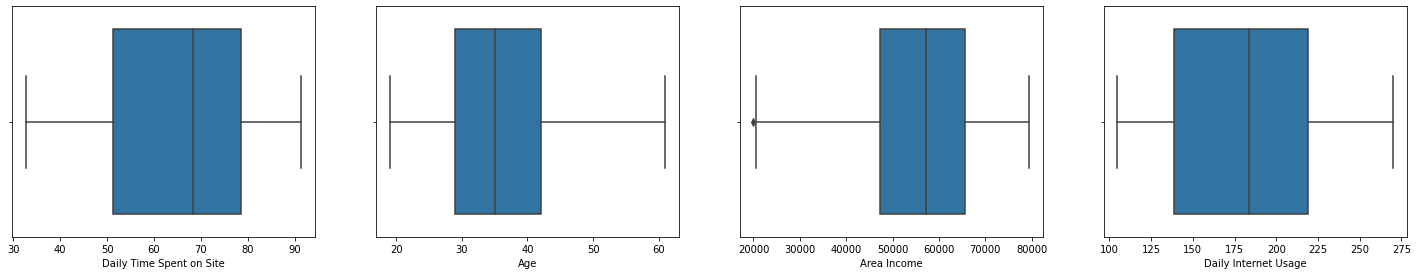

In [27]:
plt.figure(figsize=(25, 50))
for i in range(len(numerical_features)):
  plt.subplot(10, 4, i+1)
  sns.boxplot(data=data, x=numerical_features[i])

### Univariate Analysis

#### Categorical Features

In [28]:
print("Jumlah nilai yang berbeda : ")
for i in categorical_features:
  print(f"{i} --> {len(data[i].unique())}")

Jumlah nilai yang berbeda : 
Ad Topic Line --> 991
City --> 960
Male --> 2
Clicked on Ad --> 2


##### Male

   jumlah sampel  persentase
0            516        52.1
1            475        47.9


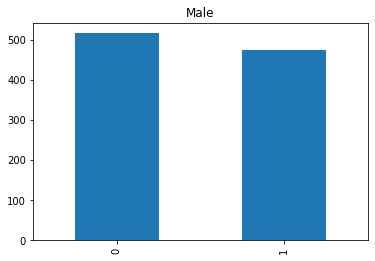

In [29]:
male = categorical_features[2]
count = data[male].value_counts()
percent = 100*data[male].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=male)

   jumlah sampel  persentase
0            516        50.5
1            475        49.5


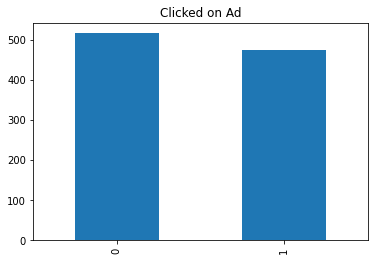

In [30]:
clicked = categorical_features[3]
count = data[male].value_counts()
percent = 100*data[clicked].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=clicked)

#### Numerical Features

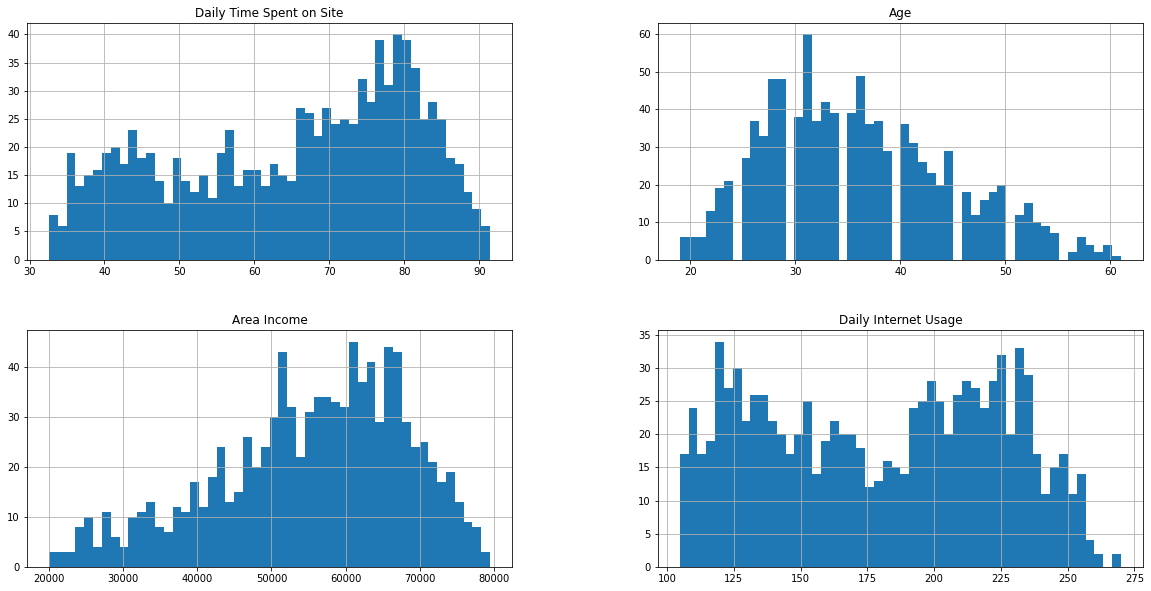

In [31]:
data[numerical_features].hist(bins=50, figsize=(20,10))
plt.show()

### Multivariate Analysis

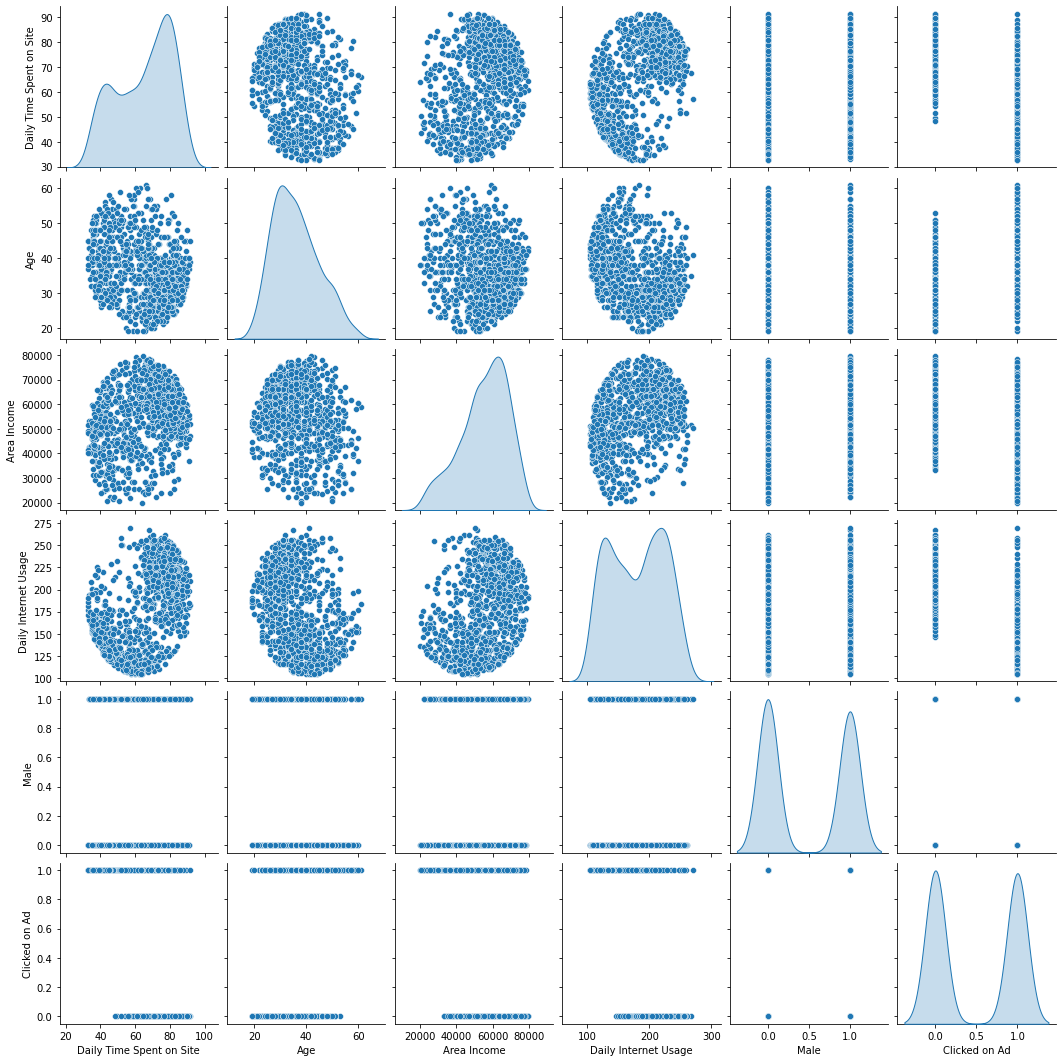

In [32]:
sns.pairplot(data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

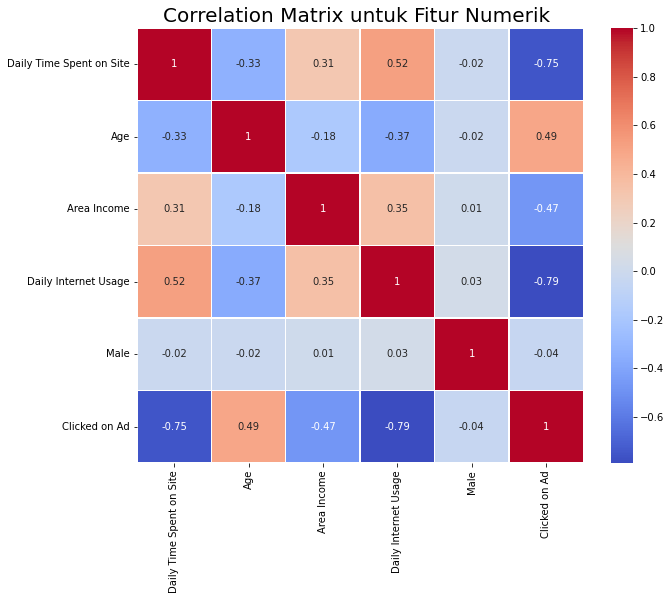

In [33]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Modeling
---
Langkah-langkah yang dilakukan pada fase modeling :
1. Memisahkan variabel fitur (x) dan label (y)
2. Melakukan scalling
3. Melakukan splitting data train dan test, dan
4. Membuat model machine learning menggunakan berbagai logaritma klasifikasi

Algoritma Machine Learning yang digunakan pada fase ini :
1. Logistic Regression
2. Klasifikasi Naive Bayes
3. Klasifikasi Random Forest, dan
4. Klasifikasi Decission Tree

In [34]:
X = data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]]
y = data['Clicked on Ad']

print("Ukuran Data :")
print(f"X : {X.shape}")
print(f"Y : {y.shape}")

Ukuran Data :
X : (991, 4)
Y : (991,)


In [35]:
scaling = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaling.fit(X)
data_scaling = scaling.transform(X)
data_scaling

array([[0.61788203, 0.38095238, 0.70331171, 0.916031  ],
       [0.80962094, 0.28571429, 0.81438261, 0.53874561],
       [0.62672106, 0.16666667, 0.66888821, 0.7974331 ],
       ...,
       [0.32347442, 0.76190476, 0.37691779, 0.09438189],
       [0.39010709, 0.        , 0.36859867, 0.50351132],
       [0.2109468 , 0.16666667, 0.16613831, 0.4453929 ]])

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

### Naive Bayes

In [38]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Classification dengan Random Forest

In [39]:
model_rf = RandomForestClassifier(n_estimators=100,
                               random_state=0
                              )
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Classification dengan Decission Tree

In [40]:
model_dt = DecisionTreeClassifier(max_depth=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

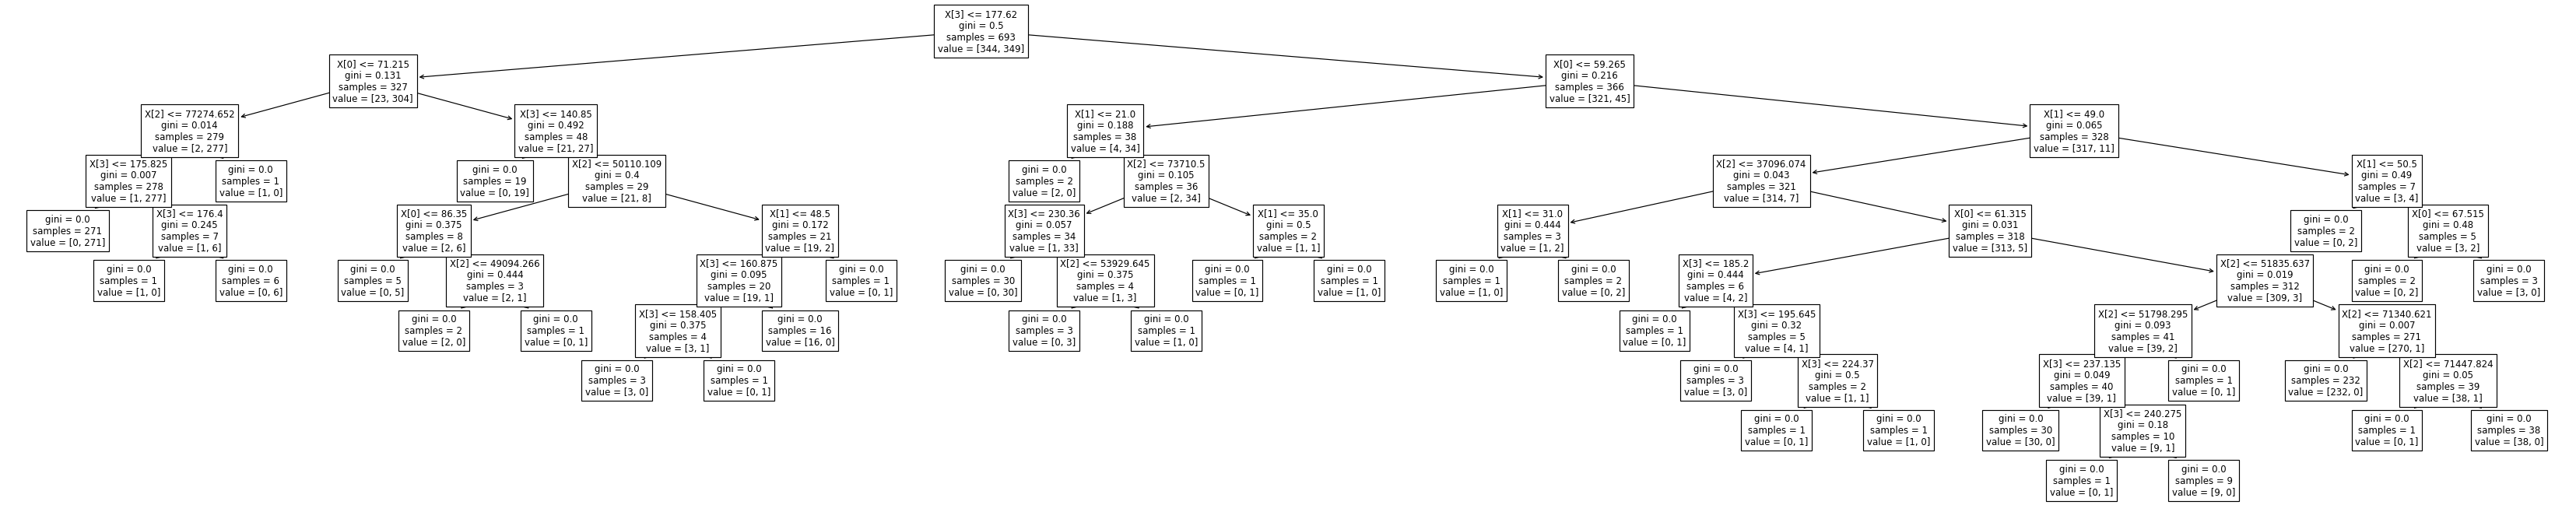

In [41]:
plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(50, 10))
tree.plot_tree(model_dt, fontsize = 10)
plt.show()

## Evaluation
---
Beberapa matriks yang digunakan untuk melakukan evaluasi antara lain :
1. Confusion matrix
2. Classification report, dan
3. Accuracy

### Logistic Regression

In [42]:
predict_lr = lr.predict(X_test)

In [43]:
print(classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       156
           1       0.92      0.85      0.88       142

    accuracy                           0.89       298
   macro avg       0.89      0.89      0.89       298
weighted avg       0.89      0.89      0.89       298



In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_lr).ravel()

print("Confusion Matrix Logistic Regression\n")
print(f"True Positive  : {tp}")
print(f"True Negative  : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")

Confusion Matrix Logistic Regression

True Positive  : 120
True Negative  : 145
False Positive : 11
False Negative : 22


### Naive Bayes

In [45]:
predict_nb = nb.predict(X_test)
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.97      0.95      0.96       142

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_nb).ravel()

print("Confusion Matrix Naive Bayes\n")
print(f"True Positive  : {tp}")
print(f"True Negative  : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")

Confusion Matrix Naive Bayes

True Positive  : 135
True Negative  : 152
False Positive : 4
False Negative : 7


### Classification dengan Random Forest

In [47]:
predict_rf = model_rf.predict(X_test)
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       156
           1       0.95      0.96      0.95       142

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298



In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_rf).ravel()

print("Confusion Matrix Classification dengan Random Forest\n")
print(f"True Positive  : {tp}")
print(f"True Negative  : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")

Confusion Matrix Classification dengan Random Forest

True Positive  : 136
True Negative  : 149
False Positive : 7
False Negative : 6


### Classification dengan Decission Tree

In [49]:
predict_dt = model_dt.predict(X_test)
print(classification_report(y_test, predict_dt))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       156
           1       0.93      0.96      0.94       142

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_dt).ravel()

print("Confusion Matrix Classification dengan Decission Tree\n")
print(f"True Positive  : {tp}")
print(f"True Negative  : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")

Confusion Matrix Classification dengan Decission Tree

True Positive  : 136
True Negative  : 145
False Positive : 11
False Negative : 6


### Accuracy Semua Model

In [51]:
predicts = {
    'Logistic Regression\t' : predict_lr,
    'Naive Bayes\t\t' : predict_nb,
    'Random Forest\t\t' : predict_rf,
    'Decission Tree\t\t' : predict_dt
}

print("Nilai Accuracy Setiap Model\n")
for key in predicts:
  acc = accuracy_score(y_test, predicts[key])
  print(f"{key}: {acc}")

Nilai Accuracy Setiap Model

Logistic Regression	: 0.889261744966443
Naive Bayes		: 0.9630872483221476
Random Forest		: 0.9563758389261745
Decission Tree		: 0.9429530201342282
